**Practical 5**

 **Aim:** To build and evaluate a Random Forest Classifier model for predicting loan defaulters, analyzing
 feature importance, and assessing model performance using metrics such as accuracy, precision,
 recall, and ROC AUC.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
bankloan = pd.read_csv("/content/BANK LOAN.csv")

In [ ]:
bankloan1 = bankloan.drop(['SN'],axis =1)
bankloan1['AGE'] = bankloan1["AGE"].astype('category')
bankloan2 = pd.get_dummies(bankloan1)
bankloan2.head()

,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER,AGE_1,AGE_2,AGE_3
0,17,12,9.3,11.36,5.01,1,False,False,True
1,10,6,17.3,1.36,4.00,0,True,False,False
2,15,14,5.5,0.86,2.17,0,False,True,False
3,15,14,2.9,2.66,0.82,0,False,False,True
4,2,0,17.3,1.79,3.06,1,True,False,False


In [ ]:
x = bankloan2.loc[:,bankloan2.columns != 'DEFAULTER']
y = bankloan2.loc[:,'DEFAULTER']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 999)

In [ ]:
#Build Random Forest Model
rf = RandomForestClassifier(n_estimators = 1000, random_state = 999, oob_score=True, max_features='sqrt')
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=999)

In [ ]:
y_pred = rf.predict(x_test)
y_pred_probs = rf.predict_proba(x_test)
cutoff = 0.3
pred_test = np.where(y_pred_probs[:,1]>cutoff,1,0)
pred_test

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
confusion_matrix(y_test,pred_test, labels=[0,1])

array([[127,  30],
       [ 16,  37]])

In [ ]:
accuracy_score(y_test, pred_test)

0.780952380952381

In [ ]:
precision_score(y_test, pred_test)

0.5522388059701493

In [ ]:
recall_score(y_test, pred_test)

0.6981132075471698

In [ ]:
auc = roc_auc_score(y_test, y_pred_probs[:,1])
print('AUC: %.3f' % auc)

AUC: 0.856


In [ ]:
rf.oob_score_

0.7714285714285715

In [ ]:
rf.feature_importances_

array([0.17906382, 0.14481169, 0.24302227, 0.20447728, 0.17989613,
       0.02108199, 0.01405277, 0.01359406])

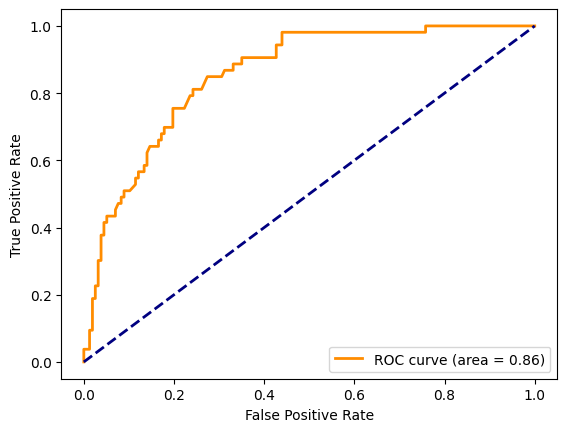

In [ ]:
# ROC Curve
RFfpr, RFtpr, threshold = roc_curve(y_test, y_pred_probs[:,1])
# plot the roc curve
plt.figure()
lw = 2
plt.plot(RFfpr, RFtpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

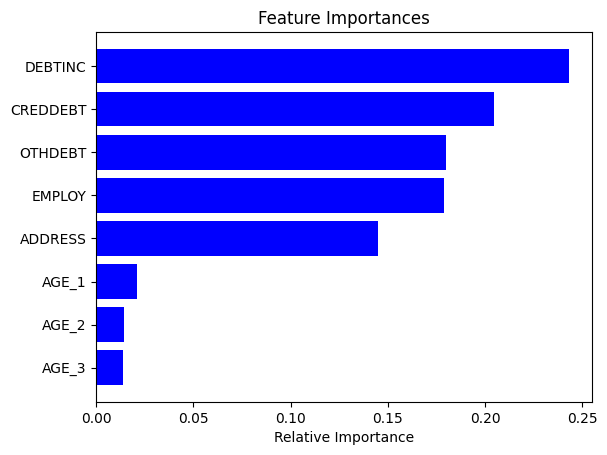

In [ ]:
#Importance matrix
features = list(x.columns)
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:
* The dataset contains information about bank loan applications.
* The 'SN' column was dropped as it is not relevant for modeling.
* The 'AGE' column was converted to a categorical variable and one-hot encoded.
* The data was split into training and testing sets.
* A Random Forest Classifier model was built with 1000 estimators.
* The model's performance was evaluated using confusion matrix, accuracy, precision, recall, and AUC.
* The feature importances were visualized.

Conclusion:
* The Random Forest model achieved an accuracy of 0.78 and an AUC of 0.86, indicating good performance in predicting loan defaulters.
* The confusion matrix shows that the model has a reasonable balance between identifying true positives and true negatives.
* The feature importance plot highlights the most influential factors in predicting loan default, with 'DEBTINC', 'CREDDEBT', and 'OTHDEBT' being the most important.
* The model can be used to assist in identifying potential loan defaulters, which can help the bank mitigate risks.